# Refs

In [ ]:
http://alanpryorjr.com/2016-12-19-Kaggle-Competition-Santander-Solution/

4/1AY0e-g7Yo8YE8ZFdVO1jTz_Ffloi_QCP-EzW9jf9YcGHGiEBDpSylCGJuG8

# Import Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize The Data Source

In [3]:
from google.colab import drive
 
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Read Dataset

In [5]:
data = pd.read_csv("/content/gdrive/My Drive/data/train_ver2.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Filtering

In [6]:
data = data[(data['fecha_dato'] == '2015-06-28') | (data['fecha_dato'] == '2016-06-28')]

In [7]:
data.shape

(632110, 48)

In [8]:
data.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
3144384,2015-06-28,16132,N,ES,V,48,1995-03-08,0.0,244,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,28.0,MADRID,0.0,160900.95,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3144385,2015-06-28,1063040,N,ES,V,25,2012-09-19,0.0,34,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,46.0,VALENCIA,1.0,74693.67,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
3144386,2015-06-28,1063041,N,ES,H,24,2012-09-19,0.0,34,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,23.0,JAEN,1.0,35053.77,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3144387,2015-06-28,1063042,N,ES,H,26,2012-09-19,0.0,34,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,11.0,CADIZ,0.0,72386.49,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3144388,2015-06-28,1063043,N,ES,V,23,2012-09-19,0.0,34,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,36.0,PONTEVEDRA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632110 entries, 3144384 to 3776493
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             632110 non-null  object 
 1   ncodpers               632110 non-null  int64  
 2   ind_empleado           630249 non-null  object 
 3   pais_residencia        630249 non-null  object 
 4   sexo                   630246 non-null  object 
 5   age                    632110 non-null  object 
 6   fecha_alta             630249 non-null  object 
 7   ind_nuevo              630249 non-null  float64
 8   antiguedad             632110 non-null  object 
 9   indrel                 630249 non-null  float64
 10  ult_fec_cli_1t         782 non-null     object 
 11  indrel_1mes            630249 non-null  object 
 12  tiprel_1mes            630249 non-null  object 
 13  indresi                630249 non-null  object 
 14  indext                 630249

In [10]:
data.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

# Data Backup

In [11]:
df = pd.DataFrame(data=data, columns=data.columns, index=data.index)

In [12]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
3144384,2015-06-28,16132,N,ES,V,48,1995-03-08,0.0,244,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,28.0,MADRID,0.0,160900.95,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3144385,2015-06-28,1063040,N,ES,V,25,2012-09-19,0.0,34,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,46.0,VALENCIA,1.0,74693.67,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
3144386,2015-06-28,1063041,N,ES,H,24,2012-09-19,0.0,34,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,23.0,JAEN,1.0,35053.77,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3144387,2015-06-28,1063042,N,ES,H,26,2012-09-19,0.0,34,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,11.0,CADIZ,0.0,72386.49,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3144388,2015-06-28,1063043,N,ES,V,23,2012-09-19,0.0,34,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,36.0,PONTEVEDRA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


# Remove NAN Values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632110 entries, 3144384 to 3776493
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             632110 non-null  object 
 1   ncodpers               632110 non-null  int64  
 2   ind_empleado           630249 non-null  object 
 3   pais_residencia        630249 non-null  object 
 4   sexo                   630246 non-null  object 
 5   age                    632110 non-null  object 
 6   fecha_alta             630249 non-null  object 
 7   ind_nuevo              630249 non-null  float64
 8   antiguedad             632110 non-null  object 
 9   indrel                 630249 non-null  float64
 10  ult_fec_cli_1t         782 non-null     object 
 11  indrel_1mes            630249 non-null  object 
 12  tiprel_1mes            630249 non-null  object 
 13  indresi                630249 non-null  object 
 14  indext                 630249

In [14]:
df.drop(['conyuemp', 'ult_fec_cli_1t', 'fecha_alta'], inplace=True, axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632110 entries, 3144384 to 3776493
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             632110 non-null  object 
 1   ncodpers               632110 non-null  int64  
 2   ind_empleado           630249 non-null  object 
 3   pais_residencia        630249 non-null  object 
 4   sexo                   630246 non-null  object 
 5   age                    632110 non-null  object 
 6   ind_nuevo              630249 non-null  float64
 7   antiguedad             632110 non-null  object 
 8   indrel                 630249 non-null  float64
 9   indrel_1mes            630249 non-null  object 
 10  tiprel_1mes            630249 non-null  object 
 11  indresi                630249 non-null  object 
 12  indext                 630249 non-null  object 
 13  canal_entrada          630228 non-null  object 
 14  indfall                630249

In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             523650 non-null  object 
 1   ncodpers               523650 non-null  int64  
 2   ind_empleado           523650 non-null  object 
 3   pais_residencia        523650 non-null  object 
 4   sexo                   523650 non-null  object 
 5   age                    523650 non-null  object 
 6   ind_nuevo              523650 non-null  float64
 7   antiguedad             523650 non-null  object 
 8   indrel                 523650 non-null  float64
 9   indrel_1mes            523650 non-null  object 
 10  tiprel_1mes            523650 non-null  object 
 11  indresi                523650 non-null  object 
 12  indext                 523650 non-null  object 
 13  canal_entrada          523650 non-null  object 
 14  indfall                523650

# Data Analysing And Cleaning

In [18]:
initial_products_label = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']

In [19]:
products_df = df.loc[:, initial_products_label]

In [20]:
products_df[products_df['ind_nomina_ult1'] == 1]

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
3144540,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,1
3144542,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1
3144543,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1.0,1.0,1
3144545,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,1
3144579,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776395,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1.0,1.0,1
3776412,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1
3776484,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,1
3776486,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1.0,1.0,1


In [21]:
products_df.drop(['ind_nomina_ult1', 'ind_nom_pens_ult1'], inplace=True, axis=1)

In [22]:
products_df

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_recibo_ult1
3144384,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3144385,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3144386,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3144387,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3144389,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776488,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3776489,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3776490,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3776491,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [23]:
products_label = products_df.columns

In [24]:
products = [i for i in range(len(products_label))]

In [25]:
products_dict = dict()

for i in range(len(products)):
  products_dict[products_label[i]] = products[i]

In [26]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   ind_ahor_fin_ult1  523650 non-null  int64
 1   ind_aval_fin_ult1  523650 non-null  int64
 2   ind_cco_fin_ult1   523650 non-null  int64
 3   ind_cder_fin_ult1  523650 non-null  int64
 4   ind_cno_fin_ult1   523650 non-null  int64
 5   ind_ctju_fin_ult1  523650 non-null  int64
 6   ind_ctma_fin_ult1  523650 non-null  int64
 7   ind_ctop_fin_ult1  523650 non-null  int64
 8   ind_ctpp_fin_ult1  523650 non-null  int64
 9   ind_deco_fin_ult1  523650 non-null  int64
 10  ind_deme_fin_ult1  523650 non-null  int64
 11  ind_dela_fin_ult1  523650 non-null  int64
 12  ind_ecue_fin_ult1  523650 non-null  int64
 13  ind_fond_fin_ult1  523650 non-null  int64
 14  ind_hip_fin_ult1   523650 non-null  int64
 15  ind_plan_fin_ult1  523650 non-null  int64
 16  ind_pres_fin_ult1  523650 non-n

In [27]:
products_df.describe()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_recibo_ult1
count,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.00000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000,523650.000000
mean,0.000141,0.000038,0.778942,0.000512,0.100311,0.012772,0.01116,0.169573,0.058109,0.002727,0.002324,0.058302,0.106279,0.024612,0.007956,0.012367,0.003210,0.069550,0.060773,0.031937,0.005307,0.164050
std,0.011887,0.006180,0.414960,0.022617,0.300415,0.112289,0.10505,0.375258,0.233950,0.052150,0.048153,0.234314,0.308195,0.154939,0.088839,0.110518,0.056567,0.254388,0.238914,0.175834,0.072656,0.370322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
for i in range(1, len(products_label)):
  products_df[products_label[i]] = products_df[products_label[i]].replace(1, products_dict[products_label[i]])

In [29]:
products_df['target'] = products_df.max(axis=1)

In [30]:
np.unique(products_df['target'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [31]:
len(np.unique(products_df['target']))

22

In [32]:
len(products_label)

22

# Remove Targets

In [33]:
x_df = pd.DataFrame(data=df, columns=df.columns, index=df.index)

In [34]:
x_df.drop(initial_products_label, inplace=True, axis=1)

In [35]:
x_df['target'] = products_df['target']

# Train Data PreProcessing

In [36]:
x_df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,target
3144384,2015-06-28,16132,N,ES,V,48,0.0,244,1.0,1,A,S,N,KAT,N,1.0,28.0,MADRID,0.0,160900.95,02 - PARTICULARES,2
3144385,2015-06-28,1063040,N,ES,V,25,0.0,34,1.0,1,A,S,N,KHE,N,1.0,46.0,VALENCIA,1.0,74693.67,03 - UNIVERSITARIO,21
3144386,2015-06-28,1063041,N,ES,H,24,0.0,34,1.0,1,A,S,N,KHE,N,1.0,23.0,JAEN,1.0,35053.77,03 - UNIVERSITARIO,2
3144387,2015-06-28,1063042,N,ES,H,26,0.0,34,1.0,1,I,S,N,KHE,N,1.0,11.0,CADIZ,0.0,72386.49,03 - UNIVERSITARIO,2
3144389,2015-06-28,1063044,N,ES,H,23,0.0,34,1.0,1,I,S,N,KHE,N,1.0,15.0,"CORUÑA, A",1.0,95281.08,03 - UNIVERSITARIO,2


In [37]:
x_df.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,target
count,5.236500e+05,523650.000000,523650.000000,523650.0,523650.000000,523650.000000,5.236500e+05,523650.000000
mean,7.812755e+05,0.021354,1.000749,1.0,26.596492,0.559628,1.342810e+05,7.626546
std,4.124386e+05,0.144561,0.270853,0.0,12.392188,0.496432,2.282979e+05,7.443261
min,1.588900e+04,0.000000,1.000000,1.0,2.000000,0.000000,1.202730e+03,0.000000
25%,4.113462e+05,0.000000,1.000000,1.0,16.000000,0.000000,6.905563e+04,2.000000
50%,8.805755e+05,0.000000,1.000000,1.0,28.000000,1.000000,1.023512e+05,2.000000
75%,1.143284e+06,0.000000,1.000000,1.0,33.000000,1.000000,1.565579e+05,12.000000
max,1.403935e+06,1.000000,99.000000,1.0,52.000000,1.000000,2.889440e+07,21.000000


In [38]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             523650 non-null  object 
 1   ncodpers               523650 non-null  int64  
 2   ind_empleado           523650 non-null  object 
 3   pais_residencia        523650 non-null  object 
 4   sexo                   523650 non-null  object 
 5   age                    523650 non-null  object 
 6   ind_nuevo              523650 non-null  float64
 7   antiguedad             523650 non-null  object 
 8   indrel                 523650 non-null  float64
 9   indrel_1mes            523650 non-null  object 
 10  tiprel_1mes            523650 non-null  object 
 11  indresi                523650 non-null  object 
 12  indext                 523650 non-null  object 
 13  canal_entrada          523650 non-null  object 
 14  indfall                523650

In [39]:
x_df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
ind_nuevo                False
antiguedad               False
indrel                   False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
canal_entrada            False
indfall                  False
tipodom                  False
cod_prov                 False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
target                   False
dtype: bool

In [40]:
x_df['fecha_dato'] = pd.to_datetime(x_df["fecha_dato"])

In [41]:
x_df.dtypes

fecha_dato               datetime64[ns]
ncodpers                          int64
ind_empleado                     object
pais_residencia                  object
sexo                             object
age                              object
ind_nuevo                       float64
antiguedad                       object
indrel                          float64
indrel_1mes                      object
tiprel_1mes                      object
indresi                          object
indext                           object
canal_entrada                    object
indfall                          object
tipodom                         float64
cod_prov                        float64
nomprov                          object
ind_actividad_cliente           float64
renta                           float64
segmento                         object
target                            int64
dtype: object

In [42]:
x_df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,target
3144384,2015-06-28,16132,N,ES,V,48,0.0,244,1.0,1,A,S,N,KAT,N,1.0,28.0,MADRID,0.0,160900.95,02 - PARTICULARES,2
3144385,2015-06-28,1063040,N,ES,V,25,0.0,34,1.0,1,A,S,N,KHE,N,1.0,46.0,VALENCIA,1.0,74693.67,03 - UNIVERSITARIO,21
3144386,2015-06-28,1063041,N,ES,H,24,0.0,34,1.0,1,A,S,N,KHE,N,1.0,23.0,JAEN,1.0,35053.77,03 - UNIVERSITARIO,2
3144387,2015-06-28,1063042,N,ES,H,26,0.0,34,1.0,1,I,S,N,KHE,N,1.0,11.0,CADIZ,0.0,72386.49,03 - UNIVERSITARIO,2
3144389,2015-06-28,1063044,N,ES,H,23,0.0,34,1.0,1,I,S,N,KHE,N,1.0,15.0,"CORUÑA, A",1.0,95281.08,03 - UNIVERSITARIO,2


In [43]:
x_df['age'].unique()

array([' 48', ' 25', ' 24', ' 26', ' 23', ' 22', ' 29', ' 36', ' 30',
       ' 32', ' 28', ' 40', ' 34', ' 63', ' 53', ' 27', ' 39', ' 60',
       ' 42', ' 31', ' 41', ' 45', ' 37', ' 35', ' 57', ' 58', ' 46',
       ' 44', ' 50', ' 47', ' 75', ' 38', ' 49', ' 43', ' 52', '  5',
       ' 18', ' 13', ' 11', ' 59', ' 33', ' 70', ' 69', ' 51', ' 82',
       ' 68', ' 54', ' 61', ' 12', ' 67', ' 14', ' 71', ' 55', ' 77',
       ' 65', ' 92', '  6', ' 10', '  7', ' 84', ' 73', ' 62', ' 17',
       ' 87', ' 15', ' 72', ' 56', ' 21', ' 66', ' 85', ' 83', '  8',
       ' 86', '  9', ' 16', ' 19', ' 79', ' 64', ' 74', ' 95', ' 80',
       ' 96', ' 81', ' 20', ' 90', ' 78', ' 88', '100', ' 76', ' 91',
       ' 94', ' 93', ' 89', ' 98', '  4', ' 97', '104', '106', '101',
       '103', ' 99', '  3', '  2', '102', '107', '109', '105', '110',
       '112', '108', '116', '115', '111', '113'], dtype=object)

In [44]:
x_df['age'].astype(str).unique()

array([' 48', ' 25', ' 24', ' 26', ' 23', ' 22', ' 29', ' 36', ' 30',
       ' 32', ' 28', ' 40', ' 34', ' 63', ' 53', ' 27', ' 39', ' 60',
       ' 42', ' 31', ' 41', ' 45', ' 37', ' 35', ' 57', ' 58', ' 46',
       ' 44', ' 50', ' 47', ' 75', ' 38', ' 49', ' 43', ' 52', '  5',
       ' 18', ' 13', ' 11', ' 59', ' 33', ' 70', ' 69', ' 51', ' 82',
       ' 68', ' 54', ' 61', ' 12', ' 67', ' 14', ' 71', ' 55', ' 77',
       ' 65', ' 92', '  6', ' 10', '  7', ' 84', ' 73', ' 62', ' 17',
       ' 87', ' 15', ' 72', ' 56', ' 21', ' 66', ' 85', ' 83', '  8',
       ' 86', '  9', ' 16', ' 19', ' 79', ' 64', ' 74', ' 95', ' 80',
       ' 96', ' 81', ' 20', ' 90', ' 78', ' 88', '100', ' 76', ' 91',
       ' 94', ' 93', ' 89', ' 98', '  4', ' 97', '104', '106', '101',
       '103', ' 99', '  3', '  2', '102', '107', '109', '105', '110',
       '112', '108', '116', '115', '111', '113'], dtype=object)

In [45]:
x_df['age'].astype(str).unique().astype(int)

array([ 48,  25,  24,  26,  23,  22,  29,  36,  30,  32,  28,  40,  34,
        63,  53,  27,  39,  60,  42,  31,  41,  45,  37,  35,  57,  58,
        46,  44,  50,  47,  75,  38,  49,  43,  52,   5,  18,  13,  11,
        59,  33,  70,  69,  51,  82,  68,  54,  61,  12,  67,  14,  71,
        55,  77,  65,  92,   6,  10,   7,  84,  73,  62,  17,  87,  15,
        72,  56,  21,  66,  85,  83,   8,  86,   9,  16,  19,  79,  64,
        74,  95,  80,  96,  81,  20,  90,  78,  88, 100,  76,  91,  94,
        93,  89,  98,   4,  97, 104, 106, 101, 103,  99,   3,   2, 102,
       107, 109, 105, 110, 112, 108, 116, 115, 111, 113])

In [46]:
len(x_df['age'].astype(str).unique())

114

In [47]:
len(x_df['age'].astype(str).unique().astype(int))

114

In [48]:
age_df = x_df.loc[:, 'age']

In [49]:
age_df.head()

3144384     48
3144385     25
3144386     24
3144387     26
3144389     23
Name: age, dtype: object

In [50]:
age_df.unique()

array([' 48', ' 25', ' 24', ' 26', ' 23', ' 22', ' 29', ' 36', ' 30',
       ' 32', ' 28', ' 40', ' 34', ' 63', ' 53', ' 27', ' 39', ' 60',
       ' 42', ' 31', ' 41', ' 45', ' 37', ' 35', ' 57', ' 58', ' 46',
       ' 44', ' 50', ' 47', ' 75', ' 38', ' 49', ' 43', ' 52', '  5',
       ' 18', ' 13', ' 11', ' 59', ' 33', ' 70', ' 69', ' 51', ' 82',
       ' 68', ' 54', ' 61', ' 12', ' 67', ' 14', ' 71', ' 55', ' 77',
       ' 65', ' 92', '  6', ' 10', '  7', ' 84', ' 73', ' 62', ' 17',
       ' 87', ' 15', ' 72', ' 56', ' 21', ' 66', ' 85', ' 83', '  8',
       ' 86', '  9', ' 16', ' 19', ' 79', ' 64', ' 74', ' 95', ' 80',
       ' 96', ' 81', ' 20', ' 90', ' 78', ' 88', '100', ' 76', ' 91',
       ' 94', ' 93', ' 89', ' 98', '  4', ' 97', '104', '106', '101',
       '103', ' 99', '  3', '  2', '102', '107', '109', '105', '110',
       '112', '108', '116', '115', '111', '113'], dtype=object)

In [51]:
age_df = age_df.astype(str)

In [52]:
age_df.unique()

array([' 48', ' 25', ' 24', ' 26', ' 23', ' 22', ' 29', ' 36', ' 30',
       ' 32', ' 28', ' 40', ' 34', ' 63', ' 53', ' 27', ' 39', ' 60',
       ' 42', ' 31', ' 41', ' 45', ' 37', ' 35', ' 57', ' 58', ' 46',
       ' 44', ' 50', ' 47', ' 75', ' 38', ' 49', ' 43', ' 52', '  5',
       ' 18', ' 13', ' 11', ' 59', ' 33', ' 70', ' 69', ' 51', ' 82',
       ' 68', ' 54', ' 61', ' 12', ' 67', ' 14', ' 71', ' 55', ' 77',
       ' 65', ' 92', '  6', ' 10', '  7', ' 84', ' 73', ' 62', ' 17',
       ' 87', ' 15', ' 72', ' 56', ' 21', ' 66', ' 85', ' 83', '  8',
       ' 86', '  9', ' 16', ' 19', ' 79', ' 64', ' 74', ' 95', ' 80',
       ' 96', ' 81', ' 20', ' 90', ' 78', ' 88', '100', ' 76', ' 91',
       ' 94', ' 93', ' 89', ' 98', '  4', ' 97', '104', '106', '101',
       '103', ' 99', '  3', '  2', '102', '107', '109', '105', '110',
       '112', '108', '116', '115', '111', '113'], dtype=object)

In [53]:
len(age_df)

523650

In [54]:
len(age_df.str.replace(" ", ""))

523650

In [55]:
age_df = age_df.str.replace(" ", "")

In [56]:
age_df = age_df.astype(int)

In [57]:
age_df.unique()

array([ 48,  25,  24,  26,  23,  22,  29,  36,  30,  32,  28,  40,  34,
        63,  53,  27,  39,  60,  42,  31,  41,  45,  37,  35,  57,  58,
        46,  44,  50,  47,  75,  38,  49,  43,  52,   5,  18,  13,  11,
        59,  33,  70,  69,  51,  82,  68,  54,  61,  12,  67,  14,  71,
        55,  77,  65,  92,   6,  10,   7,  84,  73,  62,  17,  87,  15,
        72,  56,  21,  66,  85,  83,   8,  86,   9,  16,  19,  79,  64,
        74,  95,  80,  96,  81,  20,  90,  78,  88, 100,  76,  91,  94,
        93,  89,  98,   4,  97, 104, 106, 101, 103,  99,   3,   2, 102,
       107, 109, 105, 110, 112, 108, 116, 115, 111, 113])

In [58]:
age_df.dtype

dtype('int64')

In [59]:
len(x_df['age'])

523650

In [60]:
len(age_df)

523650

In [61]:
x_df['age'] = age_df

In [62]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fecha_dato             523650 non-null  datetime64[ns]
 1   ncodpers               523650 non-null  int64         
 2   ind_empleado           523650 non-null  object        
 3   pais_residencia        523650 non-null  object        
 4   sexo                   523650 non-null  object        
 5   age                    523650 non-null  int64         
 6   ind_nuevo              523650 non-null  float64       
 7   antiguedad             523650 non-null  object        
 8   indrel                 523650 non-null  float64       
 9   indrel_1mes            523650 non-null  object        
 10  tiprel_1mes            523650 non-null  object        
 11  indresi                523650 non-null  object        
 12  indext                 523650 non-nul

In [63]:
new_columns = ['transactional_date', 'customer_code', 'employee_index', 'country_of_residence', 'gender', 'age',
                'new_customer_index', 'seniority', 'customer_type', 'cust_type_at_beg', 'cust_relation_at_beg', 'residency_index', 'foreign_index',
                'channel_used', 'decreased_index', 'address_type', 'province_code', 'province_name', 'activity_index', 'gross_income', 'segmentation', 'target'
                ]

len(new_columns)

22

In [64]:
# beg -> beginnning
# cust -> customer

x_df.columns = new_columns

In [65]:
x_df.describe()

,customer_code,age,new_customer_index,customer_type,address_type,province_code,activity_index,gross_income,target
count,5.236500e+05,523650.000000,523650.000000,523650.000000,523650.0,523650.000000,523650.000000,5.236500e+05,523650.000000
mean,7.812755e+05,40.638831,0.021354,1.000749,1.0,26.596492,0.559628,1.342810e+05,7.626546
std,4.124386e+05,17.028314,0.144561,0.270853,0.0,12.392188,0.496432,2.282979e+05,7.443261
min,1.588900e+04,2.000000,0.000000,1.000000,1.0,2.000000,0.000000,1.202730e+03,0.000000
25%,4.113462e+05,25.000000,0.000000,1.000000,1.0,16.000000,0.000000,6.905563e+04,2.000000
50%,8.805755e+05,40.000000,0.000000,1.000000,1.0,28.000000,1.000000,1.023512e+05,2.000000
75%,1.143284e+06,51.000000,0.000000,1.000000,1.0,33.000000,1.000000,1.565579e+05,12.000000
max,1.403935e+06,116.000000,1.000000,99.000000,1.0,52.000000,1.000000,2.889440e+07,21.000000


In [66]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transactional_date    523650 non-null  datetime64[ns]
 1   customer_code         523650 non-null  int64         
 2   employee_index        523650 non-null  object        
 3   country_of_residence  523650 non-null  object        
 4   gender                523650 non-null  object        
 5   age                   523650 non-null  int64         
 6   new_customer_index    523650 non-null  float64       
 7   seniority             523650 non-null  object        
 8   customer_type         523650 non-null  float64       
 9   cust_type_at_beg      523650 non-null  object        
 10  cust_relation_at_beg  523650 non-null  object        
 11  residency_index       523650 non-null  object        
 12  foreign_index         523650 non-null  object      

In [67]:
x_df['employee_index'].unique()

array(['N', 'A', 'F', 'B', 'S'], dtype=object)

In [68]:
labelEncoder = LabelEncoder()

In [69]:
labelEncoder.fit_transform(x_df['employee_index'])

array([3, 3, 3, ..., 3, 3, 3])

In [70]:
np.unique(labelEncoder.fit_transform(x_df['employee_index']))

array([0, 1, 2, 3, 4])

In [71]:
x_df['employee_index'] = labelEncoder.fit_transform(x_df['employee_index'])

In [72]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transactional_date    523650 non-null  datetime64[ns]
 1   customer_code         523650 non-null  int64         
 2   employee_index        523650 non-null  int64         
 3   country_of_residence  523650 non-null  object        
 4   gender                523650 non-null  object        
 5   age                   523650 non-null  int64         
 6   new_customer_index    523650 non-null  float64       
 7   seniority             523650 non-null  object        
 8   customer_type         523650 non-null  float64       
 9   cust_type_at_beg      523650 non-null  object        
 10  cust_relation_at_beg  523650 non-null  object        
 11  residency_index       523650 non-null  object        
 12  foreign_index         523650 non-null  object      

In [73]:
x_df['country_of_residence'].unique()

array(['ES', 'IT', 'DE', 'BO'], dtype=object)

In [74]:
x_df['new_customer_index'].unique()

array([0., 1.])

In [75]:
x_df['new_customer_index'] = x_df['new_customer_index'].astype(int)

In [76]:
x_df['new_customer_index'].unique()

array([0, 1])

In [77]:
x_df['customer_type'].unique()

array([ 1., 99.])

In [78]:
x_df['customer_type'] = x_df['customer_type'].astype(int)

In [79]:
x_df['customer_type'].unique()

array([ 1, 99])

In [80]:
x_df['cust_type_at_beg'].unique()

array([1.0], dtype=object)

In [81]:
x_df['cust_type_at_beg'] = x_df['cust_type_at_beg'].astype(float)

In [82]:
x_df['cust_type_at_beg'] = x_df['cust_type_at_beg'].apply(int)

In [83]:
x_df['cust_type_at_beg'].unique()

array([1])

In [84]:
x_df['cust_relation_at_beg'].unique()

array(['A', 'I'], dtype=object)

In [85]:
x_df['residency_index'].unique()

array(['S', 'N'], dtype=object)

In [86]:
x_df['foreign_index'].unique()

array(['N', 'S'], dtype=object)

In [87]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transactional_date    523650 non-null  datetime64[ns]
 1   customer_code         523650 non-null  int64         
 2   employee_index        523650 non-null  int64         
 3   country_of_residence  523650 non-null  object        
 4   gender                523650 non-null  object        
 5   age                   523650 non-null  int64         
 6   new_customer_index    523650 non-null  int64         
 7   seniority             523650 non-null  object        
 8   customer_type         523650 non-null  int64         
 9   cust_type_at_beg      523650 non-null  int64         
 10  cust_relation_at_beg  523650 non-null  object        
 11  residency_index       523650 non-null  object        
 12  foreign_index         523650 non-null  object      

In [88]:
x_df['channel_used'].unique()

array(['KAT', 'KHE', 'KHD', 'KFC', 'KFA', 'KHC', 'KAZ', 'KHK', 'KHL',
       'RED', 'KHN', 'KEH', 'KGC', 'KHM', 'KHO', 'KDH', 'KHF', 'KFK',
       'KHA', 'KAF', 'K00', '013', 'KAR', 'KFJ', 'KAG', 'KAA', 'KCC',
       'KFG', 'KFD', 'KGX', 'KAH', 'KAE', 'KFS', 'KFP', 'KAB', 'KFN',
       'KAP', 'KFU', 'KGY', 'KAQ', 'KAI', 'KFF', 'KGV', 'KAJ', 'KAD',
       'KBG', 'KHQ', 'KAK', '007', 'KCA', 'KDT', 'KBO', 'KBQ', 'KAY',
       'KCG', 'KBU', 'KBZ', '004', 'KDR', 'KEC', 'KEU', 'KCK', 'KDE',
       'KDO', 'KCH', 'KCI', 'KCL', 'KDA', 'KAC', 'KES', 'KAS', 'KCM',
       'KCN', 'KDQ', 'KCB', 'KDU', 'KAL', 'KAW', 'KEY', 'KCS', 'KCD',
       'KCE', 'KEJ', 'KBL', 'KAO', 'KDC', 'KEA', 'KDY', 'KEW', 'KFT',
       'KBH', 'KEV', 'KEG', 'KDZ', 'KEI', 'KEO', 'KBD', 'KDP', 'KBV',
       'KCO', 'KBR', 'KCV', 'KBF', 'KCU', 'KBX', 'KDD', 'KBW', 'KCF',
       'KDX', 'KAN', 'KAM', 'KDS', 'KBY', 'KEF', 'KBS', 'KDF', 'KCP',
       'KDB', 'KBP', 'KBE', 'KCX', 'KDV', 'KDG', 'KEB', 'KEL', 'KEZ',
       'KBB', 'KBJ',

In [89]:
x_df['decreased_index'].unique()

array(['N', 'S'], dtype=object)

In [90]:
x_df['address_type'].unique()

array([1.])

In [91]:
x_df.drop(['address_type'], inplace=True, axis=1)

In [92]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transactional_date    523650 non-null  datetime64[ns]
 1   customer_code         523650 non-null  int64         
 2   employee_index        523650 non-null  int64         
 3   country_of_residence  523650 non-null  object        
 4   gender                523650 non-null  object        
 5   age                   523650 non-null  int64         
 6   new_customer_index    523650 non-null  int64         
 7   seniority             523650 non-null  object        
 8   customer_type         523650 non-null  int64         
 9   cust_type_at_beg      523650 non-null  int64         
 10  cust_relation_at_beg  523650 non-null  object        
 11  residency_index       523650 non-null  object        
 12  foreign_index         523650 non-null  object      

In [93]:
x_df['province_code'].unique()

array([28., 46., 23., 11., 15., 33., 36., 29., 41.,  2., 14., 50., 27.,
        6.,  7., 45., 24.,  3., 21., 30., 18., 25., 32.,  5., 37., 44.,
       12.,  8., 39., 10., 43., 34., 35.,  9., 13., 22., 19., 26., 42.,
        4., 17., 16., 49., 47., 51., 52., 40., 38., 31., 48., 20.])

In [94]:
x_df['province_code'] = x_df['province_code'].apply(int)

In [95]:
x_df['province_name'].unique()

array(['MADRID', 'VALENCIA', 'JAEN', 'CADIZ', 'CORUÑA, A', 'ASTURIAS',
       'PONTEVEDRA', 'MALAGA', 'SEVILLA', 'ALBACETE', 'CORDOBA',
       'ZARAGOZA', 'LUGO', 'BADAJOZ', 'BALEARS, ILLES', 'TOLEDO', 'LEON',
       'ALICANTE', 'HUELVA', 'MURCIA', 'GRANADA', 'LERIDA', 'OURENSE',
       'AVILA', 'SALAMANCA', 'TERUEL', 'CASTELLON', 'BARCELONA',
       'CANTABRIA', 'CACERES', 'TARRAGONA', 'PALENCIA', 'PALMAS, LAS',
       'BURGOS', 'CIUDAD REAL', 'HUESCA', 'GUADALAJARA', 'RIOJA, LA',
       'SORIA', 'ALMERIA', 'GIRONA', 'CUENCA', 'ZAMORA', 'VALLADOLID',
       'CEUTA', 'MELILLA', 'SEGOVIA', 'SANTA CRUZ DE TENERIFE', 'NAVARRA',
       'BIZKAIA', 'GIPUZKOA'], dtype=object)

In [96]:
x_df['activity_index'].unique()

array([0., 1.])

In [97]:
x_df['activity_index'] = x_df['activity_index'].apply(int)

In [98]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transactional_date    523650 non-null  datetime64[ns]
 1   customer_code         523650 non-null  int64         
 2   employee_index        523650 non-null  int64         
 3   country_of_residence  523650 non-null  object        
 4   gender                523650 non-null  object        
 5   age                   523650 non-null  int64         
 6   new_customer_index    523650 non-null  int64         
 7   seniority             523650 non-null  object        
 8   customer_type         523650 non-null  int64         
 9   cust_type_at_beg      523650 non-null  int64         
 10  cust_relation_at_beg  523650 non-null  object        
 11  residency_index       523650 non-null  object        
 12  foreign_index         523650 non-null  object      

In [99]:
len(x_df['gross_income'].unique())

401537

In [100]:
len(x_df['segmentation'].unique())

3

In [101]:
x_df['segmentation'].unique()

array(['02 - PARTICULARES', '03 - UNIVERSITARIO', '01 - TOP'],
      dtype=object)

In [102]:
x_df['country_of_residence'] = labelEncoder.fit_transform(x_df['country_of_residence'])
x_df['gender'] = labelEncoder.fit_transform(x_df['gender'])
x_df['cust_relation_at_beg'] = labelEncoder.fit_transform(x_df['cust_relation_at_beg'])
x_df['residency_index'] = labelEncoder.fit_transform(x_df['residency_index'])
x_df['foreign_index'] = labelEncoder.fit_transform(x_df['foreign_index'])
x_df['decreased_index'] = labelEncoder.fit_transform(x_df['decreased_index'])
x_df['segmentation'] = labelEncoder.fit_transform(x_df['segmentation'])
x_df['province_name'] = labelEncoder.fit_transform(x_df['province_name'])

In [103]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transactional_date    523650 non-null  datetime64[ns]
 1   customer_code         523650 non-null  int64         
 2   employee_index        523650 non-null  int64         
 3   country_of_residence  523650 non-null  int64         
 4   gender                523650 non-null  int64         
 5   age                   523650 non-null  int64         
 6   new_customer_index    523650 non-null  int64         
 7   seniority             523650 non-null  object        
 8   customer_type         523650 non-null  int64         
 9   cust_type_at_beg      523650 non-null  int64         
 10  cust_relation_at_beg  523650 non-null  int64         
 11  residency_index       523650 non-null  int64         
 12  foreign_index         523650 non-null  int64       

In [104]:
x_df['transactional_date'] = labelEncoder.fit_transform(x_df['transactional_date'])

In [105]:
x_df['channel_used'] = labelEncoder.fit_transform(x_df['channel_used'])

In [106]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   transactional_date    523650 non-null  int64  
 1   customer_code         523650 non-null  int64  
 2   employee_index        523650 non-null  int64  
 3   country_of_residence  523650 non-null  int64  
 4   gender                523650 non-null  int64  
 5   age                   523650 non-null  int64  
 6   new_customer_index    523650 non-null  int64  
 7   seniority             523650 non-null  object 
 8   customer_type         523650 non-null  int64  
 9   cust_type_at_beg      523650 non-null  int64  
 10  cust_relation_at_beg  523650 non-null  int64  
 11  residency_index       523650 non-null  int64  
 12  foreign_index         523650 non-null  int64  
 13  channel_used          523650 non-null  int64  
 14  decreased_index       523650 non-null  int64 

In [107]:
x_df['seniority'].unique()

array(['    244', '     34', '     25', '     33', '     22', '     10',
       '     21', '     17', '     12', '     20', '     30', '      2',
       '      5', '     24', '     18', '      6', '     27', '      8',
       '     13', '     32', '     11', '     28', '     35', '     16',
       '     23', '      3', '     26', '     31', '      9', '      1',
       '      4', '     29', '    157', '      7', '     14', '     15',
       '     36', '     40', '     19', '    139', '     46', '     38',
       '     44', '     41', '     45', '     39', '     47', '     42',
       '     43', '     37', '     49', '     50', '     48', '     51',
       '     56', '     54', '     55', '     53', '     52', '     57',
       '     58', '    209', '    165', '    164', '    105', '     81',
       '    129', '    109', '    128', '    156', '    121', '    150',
       '    142', '     64', '    122', '    125', '    146', '    101',
       '     69', '    163', '    116', '    117', 

In [108]:
x_df[x_df['seniority'] == -999999]

,transactional_date,customer_code,employee_index,country_of_residence,gender,age,new_customer_index,seniority,customer_type,cust_type_at_beg,cust_relation_at_beg,residency_index,foreign_index,channel_used,decreased_index,province_code,province_name,activity_index,gross_income,segmentation,target


In [109]:
x_df[x_df['seniority'] == '-999999']

,transactional_date,customer_code,employee_index,country_of_residence,gender,age,new_customer_index,seniority,customer_type,cust_type_at_beg,cust_relation_at_beg,residency_index,foreign_index,channel_used,decreased_index,province_code,province_name,activity_index,gross_income,segmentation,target
3601557,0,138388,3,2,1,51,0,-999999,1,1,0,1,0,0,0,28,29,1,198122.16,0,21
3613493,0,162278,3,2,1,66,0,-999999,1,1,0,1,0,0,0,28,29,0,173862.36,1,0


In [110]:
x_df['seniority'] = x_df['seniority'].apply(str)

In [111]:
x_df['seniority'].unique()

array(['    244', '     34', '     25', '     33', '     22', '     10',
       '     21', '     17', '     12', '     20', '     30', '      2',
       '      5', '     24', '     18', '      6', '     27', '      8',
       '     13', '     32', '     11', '     28', '     35', '     16',
       '     23', '      3', '     26', '     31', '      9', '      1',
       '      4', '     29', '    157', '      7', '     14', '     15',
       '     36', '     40', '     19', '    139', '     46', '     38',
       '     44', '     41', '     45', '     39', '     47', '     42',
       '     43', '     37', '     49', '     50', '     48', '     51',
       '     56', '     54', '     55', '     53', '     52', '     57',
       '     58', '    209', '    165', '    164', '    105', '     81',
       '    129', '    109', '    128', '    156', '    121', '    150',
       '    142', '     64', '    122', '    125', '    146', '    101',
       '     69', '    163', '    116', '    117', 

In [112]:
x_df['seniority'] = x_df['seniority'].str.replace(" ", "")

In [113]:
x_df['seniority'].unique()

array(['244', '34', '25', '33', '22', '10', '21', '17', '12', '20', '30',
       '2', '5', '24', '18', '6', '27', '8', '13', '32', '11', '28', '35',
       '16', '23', '3', '26', '31', '9', '1', '4', '29', '157', '7', '14',
       '15', '36', '40', '19', '139', '46', '38', '44', '41', '45', '39',
       '47', '42', '43', '37', '49', '50', '48', '51', '56', '54', '55',
       '53', '52', '57', '58', '209', '165', '164', '105', '81', '129',
       '109', '128', '156', '121', '150', '142', '64', '122', '125',
       '146', '101', '69', '163', '116', '117', '107', '137', '108',
       '145', '61', '162', '160', '102', '88', '65', '136', '114', '113',
       '161', '217', '77', '154', '126', '159', '166', '104', '119', '94',
       '149', '103', '82', '76', '151', '70', '86', '79', '138', '135',
       '169', '60', '134', '120', '110', '148', '78', '141', '66', '140',
       '99', '147', '95', '118', '133', '124', '127', '193', '80', '132',
       '83', '123', '231', '143', '187', '111', '8

In [114]:
x_df['seniority'] = x_df['seniority'].apply(int)

In [115]:
x_df['seniority'].unique()

array([    244,      34,      25,      33,      22,      10,      21,
            17,      12,      20,      30,       2,       5,      24,
            18,       6,      27,       8,      13,      32,      11,
            28,      35,      16,      23,       3,      26,      31,
             9,       1,       4,      29,     157,       7,      14,
            15,      36,      40,      19,     139,      46,      38,
            44,      41,      45,      39,      47,      42,      43,
            37,      49,      50,      48,      51,      56,      54,
            55,      53,      52,      57,      58,     209,     165,
           164,     105,      81,     129,     109,     128,     156,
           121,     150,     142,      64,     122,     125,     146,
           101,      69,     163,     116,     117,     107,     137,
           108,     145,      61,     162,     160,     102,      88,
            65,     136,     114,     113,     161,     217,      77,
           154,     

In [116]:
x_df['seniority'].mean()

78.99196600782966

In [117]:
int(x_df['seniority'].mean())

78

In [118]:
x_df[x_df['seniority'] == -999999]

,transactional_date,customer_code,employee_index,country_of_residence,gender,age,new_customer_index,seniority,customer_type,cust_type_at_beg,cust_relation_at_beg,residency_index,foreign_index,channel_used,decreased_index,province_code,province_name,activity_index,gross_income,segmentation,target
3601557,0,138388,3,2,1,51,0,-999999,1,1,0,1,0,0,0,28,29,1,198122.16,0,21
3613493,0,162278,3,2,1,66,0,-999999,1,1,0,1,0,0,0,28,29,0,173862.36,1,0


In [119]:
seniority_df = x_df.loc[:, 'seniority']

In [120]:
seniority_df.head()

3144384    244
3144385     34
3144386     34
3144387     34
3144389     34
Name: seniority, dtype: int64

In [121]:
len(seniority_df.unique())

247

In [122]:
seniority_df[seniority_df == -999999]

3601557   -999999
3613493   -999999
Name: seniority, dtype: int64

In [123]:
int(seniority_df.mean())

78

In [124]:
seniority_df[seniority_df == -999999] = int(seniority_df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
len(seniority_df.unique())

246

In [126]:
x_df['seniority'].unique()

array([244,  34,  25,  33,  22,  10,  21,  17,  12,  20,  30,   2,   5,
        24,  18,   6,  27,   8,  13,  32,  11,  28,  35,  16,  23,   3,
        26,  31,   9,   1,   4,  29, 157,   7,  14,  15,  36,  40,  19,
       139,  46,  38,  44,  41,  45,  39,  47,  42,  43,  37,  49,  50,
        48,  51,  56,  54,  55,  53,  52,  57,  58, 209, 165, 164, 105,
        81, 129, 109, 128, 156, 121, 150, 142,  64, 122, 125, 146, 101,
        69, 163, 116, 117, 107, 137, 108, 145,  61, 162, 160, 102,  88,
        65, 136, 114, 113, 161, 217,  77, 154, 126, 159, 166, 104, 119,
        94, 149, 103,  82,  76, 151,  70,  86,  79, 138, 135, 169,  60,
       134, 120, 110, 148,  78, 141,  66, 140,  99, 147,  95, 118, 133,
       124, 127, 193,  80, 132,  83, 123, 231, 143, 187, 111,  85,  98,
       170, 106,  84,  63, 155, 189, 175,  87, 177, 115, 112, 232,  97,
       152, 144,  93, 203, 131, 172, 158, 100,  72, 176, 153,  89,  96,
       174, 194,  71, 173, 212,  68,  59,  74, 130,  73, 183, 18

In [127]:
x_df['target'] = x_df['target'].astype(int)

In [128]:
x_df['target'].unique()

array([ 2, 21, 12, 17,  0, 11,  5,  4, 13, 18, 19,  6, 15, 16,  9,  3, 10,
       20,  7,  8, 14,  1])

In [129]:
len(x_df[x_df['target'] == 0])

12693

In [130]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523650 entries, 3144384 to 3776492
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   transactional_date    523650 non-null  int64  
 1   customer_code         523650 non-null  int64  
 2   employee_index        523650 non-null  int64  
 3   country_of_residence  523650 non-null  int64  
 4   gender                523650 non-null  int64  
 5   age                   523650 non-null  int64  
 6   new_customer_index    523650 non-null  int64  
 7   seniority             523650 non-null  int64  
 8   customer_type         523650 non-null  int64  
 9   cust_type_at_beg      523650 non-null  int64  
 10  cust_relation_at_beg  523650 non-null  int64  
 11  residency_index       523650 non-null  int64  
 12  foreign_index         523650 non-null  int64  
 13  channel_used          523650 non-null  int64  
 14  decreased_index       523650 non-null  int64 

In [131]:
del age_df
del seniority_df

In [132]:
x_df['age'][(x_df['age'] >= 0) & (x_df['age'] <= 10)] = 0
x_df['age'][(x_df['age'] >= 11) & (x_df['age'] <= 20)] = 1
x_df['age'][(x_df['age'] >= 21) & (x_df['age'] <= 30)] = 2
x_df['age'][(x_df['age'] >= 31) & (x_df['age'] <= 40)] = 3
x_df['age'][(x_df['age'] >= 41) & (x_df['age'] <= 50)] = 4
x_df['age'][(x_df['age'] >= 51) & (x_df['age'] <= 60)] = 5
x_df['age'][(x_df['age'] >= 61) & (x_df['age'] <= 70)] = 6
x_df['age'][(x_df['age'] >= 71) & (x_df['age'] <= 80)] = 7
x_df['age'][(x_df['age'] >= 81) & (x_df['age'] <= 90)] = 8
x_df['age'][(x_df['age'] >= 91) & (x_df['age'] <= 100)] = 9
x_df['age'][(x_df['age'] >= 101) & (x_df['age'] <= 200)] = 10

# x_df['age'][(x_df['age'] >= 0) & (x_df['age'] <= 30)] = 0
# x_df['age'][(x_df['age'] >= 31) & (x_df['age'] <= 60)] = 1
# x_df['age'][(x_df['age'] >= 61) & (x_df['age'] <= 90)] = 2
# x_df['age'][(x_df['age'] >= 91) & (x_df['age'] <= 200)] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [133]:
x_df['age'].unique()

array([ 4,  2,  3,  6,  5,  7,  0,  1,  8,  9, 10])

In [134]:
# x_df['seniority'][(x_df['seniority'] >= 0) & (x_df['seniority'] <= 80)] = 0
# x_df['seniority'][(x_df['seniority'] >= 81) & (x_df['seniority'] <= 160)] = 1
# x_df['seniority'][(x_df['seniority'] >= 161) & (x_df['seniority'] <= 240)] = 2
# x_df['seniority'][(x_df['seniority'] >= 241) & (x_df['seniority'] <= 300)] = 3

x_df['seniority'][(x_df['seniority'] >= 0) & (x_df['seniority'] <= 20)] = 0
x_df['seniority'][(x_df['seniority'] >= 21) & (x_df['seniority'] <= 40)] = 1
x_df['seniority'][(x_df['seniority'] >= 41) & (x_df['seniority'] <= 60)] = 3
x_df['seniority'][(x_df['seniority'] >= 61) & (x_df['seniority'] <= 80)] = 4
x_df['seniority'][(x_df['seniority'] >= 81) & (x_df['seniority'] <= 100)] = 5
x_df['seniority'][(x_df['seniority'] >= 101) & (x_df['seniority'] <= 120)] = 6
x_df['seniority'][(x_df['seniority'] >= 121) & (x_df['seniority'] <= 140)] = 7
x_df['seniority'][(x_df['seniority'] >= 141) & (x_df['seniority'] <= 160)] = 8
x_df['seniority'][(x_df['seniority'] >= 161) & (x_df['seniority'] <= 180)] = 9
x_df['seniority'][(x_df['seniority'] >= 181) & (x_df['seniority'] <= 200)] = 10
x_df['seniority'][(x_df['seniority'] >= 201) & (x_df['seniority'] <= 220)] = 11
x_df['seniority'][(x_df['seniority'] >= 221) & (x_df['seniority'] <= 240)] = 12
x_df['seniority'][(x_df['seniority'] >= 241) & (x_df['seniority'] <= 260)] = 13

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value

In [135]:
x_df['seniority'].unique()

array([13,  1,  0,  8,  7,  3, 11,  9,  6,  5,  4, 10, 12])

In [136]:
x_df['gross_income'].max()

28894395.51

In [137]:
x_df['gross_income'][(x_df['gross_income'] >= 0) & (x_df['gross_income'] <= 19999)] = 0
x_df['gross_income'][(x_df['gross_income'] >= 20000) & (x_df['gross_income'] <= 39999)] = 1
x_df['gross_income'][(x_df['gross_income'] >= 40000) & (x_df['gross_income'] <= 59999)] = 2
x_df['gross_income'][(x_df['gross_income'] >= 60000) & (x_df['gross_income'] <= 79999)] = 3
x_df['gross_income'][(x_df['gross_income'] >= 80000) & (x_df['gross_income'] <= 99999)] = 4
x_df['gross_income'][(x_df['gross_income'] >= 100000) & (x_df['gross_income'] <= 119999)] = 5
x_df['gross_income'][(x_df['gross_income'] >= 120000) & (x_df['gross_income'] <= 139999)] = 6
x_df['gross_income'][x_df['gross_income'] >= 140000] = 7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [138]:
x_df['gross_income'].unique()

array([7.0000000e+00, 3.0000000e+00, 1.0000000e+00, 4.0000000e+00,
       5.0000000e+00, 2.0000000e+00, 6.0000000e+00, 0.0000000e+00,
       3.9999240e+04, 5.9999190e+04, 7.9999440e+04, 3.9999660e+04,
       9.9999210e+04, 9.9999780e+04, 1.1999934e+05, 3.9999060e+04,
       5.9999220e+04, 7.9999200e+04, 5.9999460e+04, 7.9999830e+04,
       7.9999680e+04, 5.9999820e+04, 1.1999991e+05, 7.9999230e+04])

In [139]:
x_df['gross_income'] = x_df['gross_income'].apply(int)

In [140]:
x_df['gross_income'].unique()

array([     7,      3,      1,      4,      5,      2,      6,      0,
        39999,  59999,  79999,  99999, 119999])

In [141]:
x_df['gross_income'][x_df['gross_income'] == 39999]

3151481    39999
3198775    39999
3271384    39999
Name: gross_income, dtype: int64

In [142]:
x_df['gross_income'][x_df['gross_income'] == 39999] = 0

In [143]:
x_df['gross_income'][x_df['gross_income'] == 64999] = 1

In [144]:
x_df['gross_income'][x_df['gross_income'] == 79999] = 2

In [145]:
x_df['gross_income'].unique()

array([     7,      3,      1,      4,      5,      2,      6,      0,
        59999,  99999, 119999])

In [146]:
len(products_label)

22

In [147]:
len(x_df['target'].unique())

22

In [148]:
x_df.head()

,transactional_date,customer_code,employee_index,country_of_residence,gender,age,new_customer_index,seniority,customer_type,cust_type_at_beg,cust_relation_at_beg,residency_index,foreign_index,channel_used,decreased_index,province_code,province_name,activity_index,gross_income,segmentation,target
3144384,0,16132,3,2,1,4,0,13,1,1,0,1,0,23,0,28,29,0,7,1,2
3144385,0,1063040,3,2,1,2,0,1,1,1,0,1,0,144,0,46,47,1,3,2,21
3144386,0,1063041,3,2,0,2,0,1,1,1,0,1,0,144,0,23,25,1,1,2,2
3144387,0,1063042,3,2,0,2,0,1,1,1,1,1,0,144,0,11,11,0,3,2,2
3144389,0,1063044,3,2,0,2,0,1,1,1,1,1,0,144,0,15,17,1,4,2,2


In [149]:
x_df['channel_used'].unique()

array([ 23, 144, 143, 118, 116, 142,  28, 146, 147, 152, 149, 101, 135,
       148, 150,  78, 145, 126, 141,   9,   3,   2,  21, 125,  10,   4,
        51, 122, 119, 139,  11,   8, 131, 130,   5, 129,  19, 133, 140,
        20,  12, 121, 137,  13,   7,  33, 151,  14,   1,  49,  87,  38,
        40,  27,  55,  43,  48,   0,  85,  96, 111,  59,  75,  82,  56,
        57,  60,  71,   6, 110,  22,  61,  62,  84,  50,  88,  15,  26,
       114,  67,  52,  53, 103,  36,  18,  73,  94,  92, 113, 132,  34,
       112, 100,  93, 102, 108,  30,  83,  44,  63,  41,  69,  32,  68,
        46,  74,  45,  54,  91,  17,  16,  86,  47,  99,  42,  76,  64,
        72,  39,  31,  70,  89,  77,  95, 105, 115,  29,  35,  80,  90,
       123,  37, 107, 124, 109,  25,  97,  24, 104, 117, 120, 138, 128,
       127, 134, 136,  79,  65,  66,  81,  98, 106,  58])

In [150]:
print(sorted(x_df['channel_used'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152]


In [151]:
print(sorted(x_df['province_code'].unique()))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [152]:
print(sorted(x_df['province_name'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [153]:
x_df.columns

Index(['transactional_date', 'customer_code', 'employee_index',
       'country_of_residence', 'gender', 'age', 'new_customer_index',
       'seniority', 'customer_type', 'cust_type_at_beg',
       'cust_relation_at_beg', 'residency_index', 'foreign_index',
       'channel_used', 'decreased_index', 'province_code', 'province_name',
       'activity_index', 'gross_income', 'segmentation', 'target'],
      dtype='object')

In [154]:
for i in x_df.columns:
  unique = x_df[i].unique()
  print(i, "-", unique, "-->", len(unique))
  print()

transactional_date - [0] --> 1

customer_code - [  16132 1063040 1063041 ...  549682  549673  889143] --> 523650

employee_index - [3 0 2 1 4] --> 5

country_of_residence - [2 3 1 0] --> 4

gender - [1 0] --> 2

age - [ 4  2  3  6  5  7  0  1  8  9 10] --> 11

new_customer_index - [0 1] --> 2

seniority - [13  1  0  8  7  3 11  9  6  5  4 10 12] --> 13

customer_type - [ 1 99] --> 2

cust_type_at_beg - [1] --> 1

cust_relation_at_beg - [0 1] --> 2

residency_index - [1 0] --> 2

foreign_index - [0 1] --> 2

channel_used - [ 23 144 143 118 116 142  28 146 147 152 149 101 135 148 150  78 145 126
 141   9   3   2  21 125  10   4  51 122 119 139  11   8 131 130   5 129
  19 133 140  20  12 121 137  13   7  33 151  14   1  49  87  38  40  27
  55  43  48   0  85  96 111  59  75  82  56  57  60  71   6 110  22  61
  62  84  50  88  15  26 114  67  52  53 103  36  18  73  94  92 113 132
  34 112 100  93 102 108  30  83  44  63  41  69  32  68  46  74  45  54
  91  17  16  86  47  99  42  76  

In [155]:
x_df['customer_type'] = labelEncoder.fit_transform(x_df['customer_type'])

In [156]:
x_df['customer_type'].unique()

array([0, 1])

In [157]:
customer_code_df = x_df.loc[:, 'customer_code']

In [158]:
len(x_df['target'][x_df['target'] == 1])

15

In [159]:
for i in sorted(x_df['target'].unique()):
  print(i, "-->", len(x_df['target'][x_df['target'] == i]))

0 --> 12693
1 --> 15
2 --> 266512
3 --> 67
4 --> 5581
5 --> 6657
6 --> 3580
7 --> 54738
8 --> 11259
9 --> 1129
10 --> 408
11 --> 12487
12 --> 22621
13 --> 5640
14 --> 397
15 --> 2364
16 --> 1149
17 --> 10883
18 --> 8298
19 --> 9418
20 --> 1849
21 --> 85905


In [160]:
x_df.head()

,transactional_date,customer_code,employee_index,country_of_residence,gender,age,new_customer_index,seniority,customer_type,cust_type_at_beg,cust_relation_at_beg,residency_index,foreign_index,channel_used,decreased_index,province_code,province_name,activity_index,gross_income,segmentation,target
3144384,0,16132,3,2,1,4,0,13,0,1,0,1,0,23,0,28,29,0,7,1,2
3144385,0,1063040,3,2,1,2,0,1,0,1,0,1,0,144,0,46,47,1,3,2,21
3144386,0,1063041,3,2,0,2,0,1,0,1,0,1,0,144,0,23,25,1,1,2,2
3144387,0,1063042,3,2,0,2,0,1,0,1,1,1,0,144,0,11,11,0,3,2,2
3144389,0,1063044,3,2,0,2,0,1,0,1,1,1,0,144,0,15,17,1,4,2,2


# Sample Testing

In [ ]:
len(x_df)

523650

In [ ]:
sample_0 = x_df.sample(n=20000)

In [ ]:
sample_0.head()

,transactional_date,customer_code,employee_index,country_of_residence,gender,age,new_customer_index,seniority,customer_type,cust_type_at_beg,cust_relation_at_beg,residency_index,foreign_index,channel_used,decreased_index,province_code,province_name,activity_index,gross_income,segmentation,target
3609508,0,159853,3,2,1,2,0,1,0,1,1,1,1,23,0,28,29,0,2,1,0
3704856,0,468105,3,2,0,4,0,2,0,1,1,1,0,48,0,28,29,0,5,1,7
3567726,0,27963,3,2,1,2,0,4,0,1,0,1,0,23,0,28,29,1,5,1,7
3709530,0,503405,3,2,0,2,0,2,0,1,0,1,0,23,0,28,29,1,5,1,10
3189837,0,1111403,3,2,1,2,0,0,0,1,0,1,0,23,0,15,17,1,3,0,12


In [ ]:
sample_0.describe()

,transactional_date,customer_code,employee_index,country_of_residence,gender,age,new_customer_index,seniority,customer_type,cust_type_at_beg,cust_relation_at_beg,residency_index,foreign_index,channel_used,decreased_index,province_code,province_name,activity_index,gross_income,segmentation,target
count,20000.0,2.000000e+04,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.0,7.828169e+05,2.998700,2.0,0.546650,1.606650,0.021050,1.160150,0.0,1.0,0.460850,1.0,0.041450,95.701950,0.002600,26.663800,26.543950,0.557650,3.574000,1.304200,7.533650
std,0.0,4.112872e+05,0.051947,0.0,0.497831,0.809542,0.143555,1.326797,0.0,0.0,0.498477,0.0,0.199334,53.364963,0.050925,12.346485,13.280033,0.496678,1.127336,0.561407,7.417595
min,0.0,1.591100e+04,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,1.0,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,4.152335e+05,3.000000,2.0,0.000000,1.000000,0.000000,0.000000,0.0,1.0,0.000000,1.0,0.000000,23.000000,0.000000,17.000000,17.000000,0.000000,3.000000,1.000000,2.000000
50%,0.0,8.757230e+05,3.000000,2.0,1.000000,1.000000,0.000000,1.000000,0.0,1.0,0.000000,1.0,0.000000,118.000000,0.000000,28.000000,29.000000,1.000000,4.000000,1.000000,2.000000
75%,0.0,1.145720e+06,3.000000,2.0,1.000000,2.000000,0.000000,2.000000,0.0,1.0,1.000000,1.0,0.000000,144.000000,0.000000,33.000000,32.000000,1.000000,5.000000,2.000000,12.000000
max,0.0,1.403577e+06,3.000000,2.0,1.000000,4.000000,1.000000,4.000000,0.0,1.0,1.000000,1.0,1.000000,152.000000,1.000000,52.000000,50.000000,1.000000,5.000000,2.000000,21.000000


In [ ]:
for i in sorted(sample_0['target'].unique()):
  print(i, "-->", len(sample_0['target'][sample_0['target'] == i]))

0 --> 472
1 --> 1
2 --> 10313
3 --> 5
4 --> 241
5 --> 252
6 --> 144
7 --> 2067
8 --> 419
9 --> 43
10 --> 24
11 --> 480
12 --> 812
13 --> 208
14 --> 12
15 --> 84
16 --> 50
17 --> 368
18 --> 347
19 --> 354
20 --> 73
21 --> 3231


In [ ]:
len(sample_0[sample_0['target'] == 1])

1

In [ ]:
for i in sample_0['target'].unique():
  if len(sample_0[sample_0['target'] == i]) < 500:
    sample_0.drop(sample_0[sample_0['target'] == i].index, inplace=True)

In [ ]:
for i in sorted(sample_0['target'].unique()):
  print(i, "-->", len(sample_0['target'][sample_0['target'] == i]))

2 --> 10313
7 --> 2067
12 --> 812
21 --> 3231


In [ ]:
sample_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19708 entries, 3609508 to 3745992
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   transactional_date    19708 non-null  int64
 1   customer_code         19708 non-null  int64
 2   employee_index        19708 non-null  int64
 3   country_of_residence  19708 non-null  int64
 4   gender                19708 non-null  int64
 5   age                   19708 non-null  int64
 6   new_customer_index    19708 non-null  int64
 7   seniority             19708 non-null  int64
 8   customer_type         19708 non-null  int64
 9   cust_type_at_beg      19708 non-null  int64
 10  cust_relation_at_beg  19708 non-null  int64
 11  residency_index       19708 non-null  int64
 12  foreign_index         19708 non-null  int64
 13  channel_used          19708 non-null  int64
 14  decreased_index       19708 non-null  int64
 15  province_code         19708 non-null  int64
 

In [ ]:
sample_0.drop(['transactional_date', 'cust_type_at_beg', 'target', 'customer_code', 'channel_used', 'province_code', 'province_name'], axis=1).head()

,employee_index,country_of_residence,gender,age,new_customer_index,seniority,customer_type,cust_relation_at_beg,residency_index,foreign_index,decreased_index,activity_index,gross_income,segmentation
3609508,3,2,1,2,0,1,0,1,1,1,0,0,2,1
3704856,3,2,0,4,0,2,0,1,1,0,0,0,5,1
3567726,3,2,1,2,0,4,0,0,1,0,0,1,5,1
3189837,3,2,1,2,0,0,0,0,1,0,0,1,3,0
3302608,3,2,1,1,0,0,0,1,1,0,0,0,3,2


In [ ]:
sample_x = sample_0.drop(['transactional_date', 'cust_type_at_beg', 'target', 'customer_code', 'channel_used', 'province_code', 'province_name'], axis=1).values
sample_y = sample_0.loc[:, 'target'].values

In [ ]:
sample_x

array([[3, 2, 1, ..., 0, 2, 1],
       [3, 2, 0, ..., 0, 5, 1],
       [3, 2, 1, ..., 1, 5, 1],
       ...,
       [3, 2, 0, ..., 1, 4, 1],
       [3, 2, 1, ..., 0, 3, 2],
       [3, 2, 0, ..., 0, 3, 1]])

In [ ]:
np.unique(sample_y)

array([ 0,  2,  4,  5,  6,  7,  8, 11, 12, 13, 17, 18, 19, 21])

In [ ]:
def knn_model(x_data, y_data, n=1):
  knn_model = KNeighborsClassifier(n_neighbors=n)
  knn_model.fit(x_data, y_data)

  y_pred_data = knn_model.predict(x_data)
  print("Accuracy if n ==", n, "->", accuracy_score(y_data, y_pred_data))

In [ ]:
for i in range(1, 50):
  knn_model(sample_x, sample_y, i)

Accuracy if n == 1 -> 0.7013943859221823
Accuracy if n == 2 -> 0.6953662546428789
Accuracy if n == 3 -> 0.7223406198623881
Accuracy if n == 4 -> 0.7236802045911223
Accuracy if n == 5 -> 0.7307434695244475
Accuracy if n == 6 -> 0.7282469707118067
Accuracy if n == 7 -> 0.737319612738233
Accuracy if n == 8 -> 0.7406685745600682
Accuracy if n == 9 -> 0.7386591974669671
Accuracy if n == 10 -> 0.7389027583267369
Accuracy if n == 11 -> 0.7399378919807587
Accuracy if n == 12 -> 0.7426170614382269
Accuracy if n == 13 -> 0.7407294647750107
Accuracy if n == 14 -> 0.7411556962796079
Accuracy if n == 15 -> 0.7427388418681118
Accuracy if n == 16 -> 0.7423126103635146
Accuracy if n == 17 -> 0.7413383669244352
Accuracy if n == 18 -> 0.7448699993910979
Accuracy if n == 19 -> 0.7466358156244292
Accuracy if n == 20 -> 0.7460269134750046
Accuracy if n == 21 -> 0.7450526700359252
Accuracy if n == 22 -> 0.7449308896060403
Accuracy if n == 23 -> 0.7445046581014431


# Splitting DataFrame

In [195]:
x = x_df.drop(['customer_code', 'channel_used', 'province_code', 'province_name'], axis=1)

In [196]:
y = x_df.loc[:, 'target']

In [163]:
x.head()

,transactional_date,employee_index,country_of_residence,gender,age,new_customer_index,seniority,customer_type,cust_type_at_beg,cust_relation_at_beg,residency_index,foreign_index,decreased_index,activity_index,gross_income,segmentation,target
3144384,0,3,2,1,4,0,13,0,1,0,1,0,0,0,7,1,2
3144385,0,3,2,1,2,0,1,0,1,0,1,0,0,1,3,2,21
3144386,0,3,2,0,2,0,1,0,1,0,1,0,0,1,1,2,2
3144387,0,3,2,0,2,0,1,0,1,1,1,0,0,0,3,2,2
3144389,0,3,2,0,2,0,1,0,1,1,1,0,0,1,4,2,2


In [164]:
x['employee_index']

3144384    3
3144385    3
3144386    3
3144387    3
3144389    3
          ..
3776488    3
3776489    3
3776490    3
3776491    3
3776492    3
Name: employee_index, Length: 523650, dtype: int64

In [165]:
len(x['employee_index'][x['employee_index'] == 4])

1

In [166]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

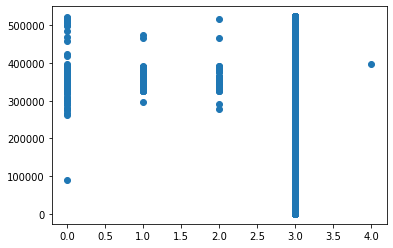

In [167]:
plt.scatter(x['employee_index'], np.arange(len(x)))

In [168]:
x.columns

Index(['transactional_date', 'employee_index', 'country_of_residence',
       'gender', 'age', 'new_customer_index', 'seniority', 'customer_type',
       'cust_type_at_beg', 'cust_relation_at_beg', 'residency_index',
       'foreign_index', 'decreased_index', 'activity_index', 'gross_income',
       'segmentation', 'target'],
      dtype='object')


 transactional_date 

0 --> 523650

 employee_index 

0 --> 133
1 --> 176
2 --> 131
3 --> 523209
4 --> 1

 country_of_residence 

0 --> 1
1 --> 1
2 --> 523646
3 --> 2

 gender 

0 --> 235962
1 --> 287688

 age 

0 --> 1608
1 --> 12160
2 --> 178313
3 --> 80742
4 --> 118072
5 --> 65219
6 --> 33440
7 --> 20207
8 --> 10413
9 --> 3051
10 --> 425

 new_customer_index 

0 --> 512468
1 --> 11182

 seniority 

0 --> 94698
1 --> 113309
2 --> 0
3 --> 60514
4 --> 21973
5 --> 29286
6 --> 38571
7 --> 34018
8 --> 35148
9 --> 47743
10 --> 22730
11 --> 15911
12 --> 8988

 customer_type 

0 --> 523646
1 --> 4

 cust_type_at_beg 

0 --> 0

 cust_relation_at_beg 

0 --> 284203
1 --> 239447

 residency_index 

0 --> 4
1 --> 523646

 foreign_index 

0 --> 502470
1 --> 21180

 decreased_index 

0 --> 522391
1 --> 1259

 activity_index 

0 --> 230601
1 --> 293049

 gross_income 

0 --> 1714
1 --> 23576
2 --> 67207
3 --> 85110
4 --> 76322
5 --> 61462
6 --> 47578
7 --> 160673
8 --> 0
9 --> 0
10 --> 0

 segment

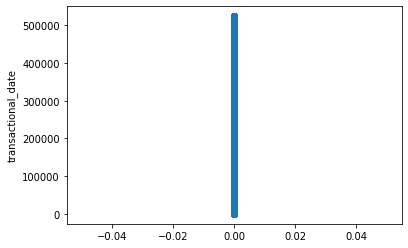

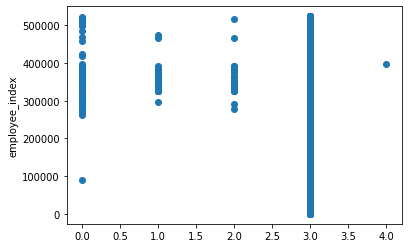

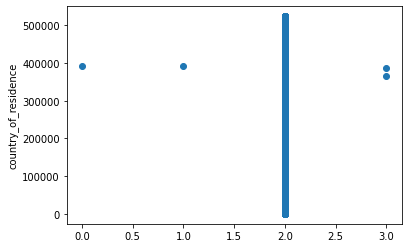

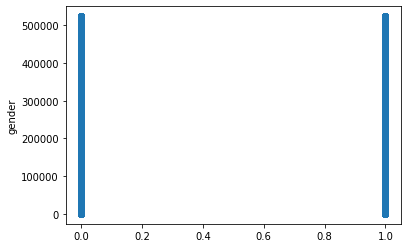

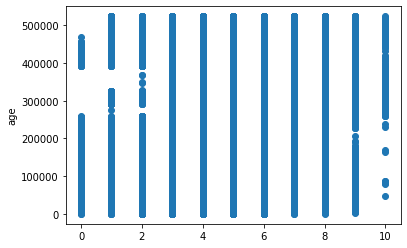

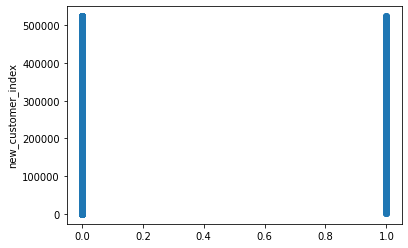

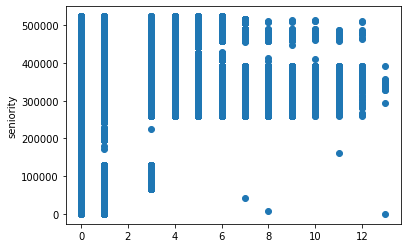

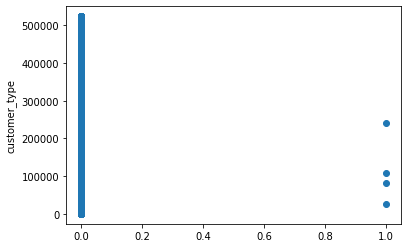

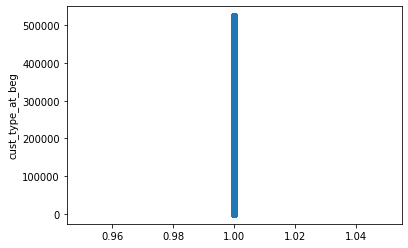

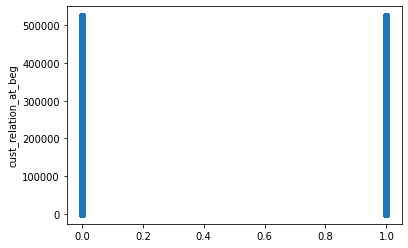

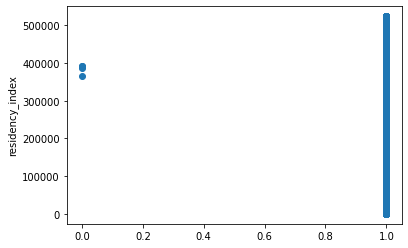

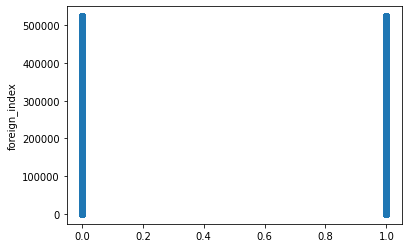

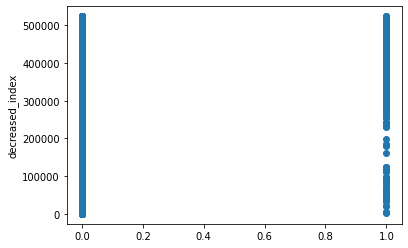

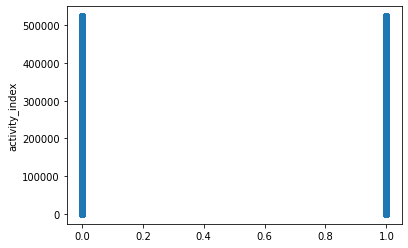

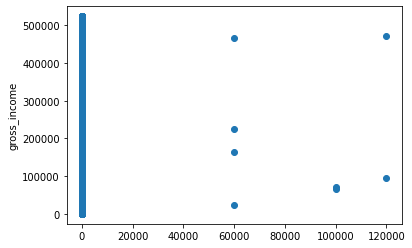

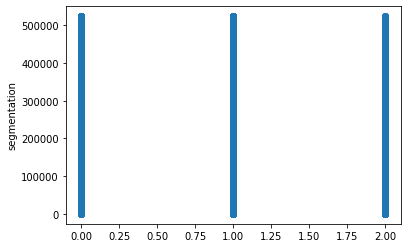

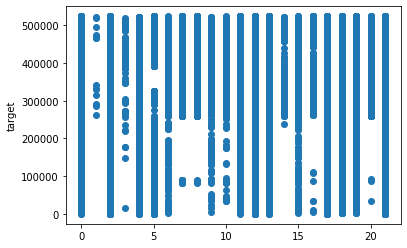

In [169]:
for column in x.columns:
  print('\n', column, '\n')
  fig, ax = plt.subplots(figsize=(6, 4))
  ax.scatter(x[column], np.arange(len(x[column])))
  plt.ylabel(column)

  for i in range(len(x[column].unique())):
    print(i, "-->", len(x[x[column] == i]))

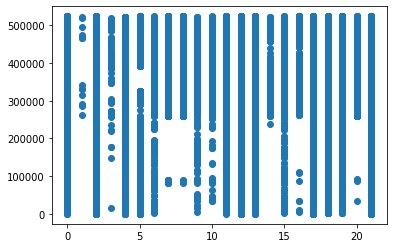

In [170]:
plt.scatter(y, np.arange(len(y)))

In [171]:
len(x)

523650

In [172]:
x['employee_index'][x['employee_index'] == 0].index

Int64Index([3252454, 3464425, 3471930, 3480344, 3483251, 3486921, 3495222,
            3502415, 3507795, 3515535,
            ...
            3730526, 3746078, 3748503, 3758043, 3758440, 3760177, 3766039,
            3770082, 3770651, 3774583],
           dtype='int64', length=133)

In [173]:
for column in x.columns:
  print('\n', column, '\n')
  for uni in x[column].unique():
    if len(x[x[column] == uni]) < 5000:
      print(uni, "-->", len(x[x[column] == uni]), '::)->',  x[x[column] == uni].index)
      # x.drop(x[x[column] == uni].index, inplace=True)


 transactional_date 


 employee_index 

0 --> 133 ::)-> Int64Index([3252454, 3464425, 3471930, 3480344, 3483251, 3486921, 3495222,
            3502415, 3507795, 3515535,
            ...
            3730526, 3746078, 3748503, 3758043, 3758440, 3760177, 3766039,
            3770082, 3770651, 3774583],
           dtype='int64', length=133)
2 --> 131 ::)-> Int64Index([3481586, 3499285, 3539830, 3540168, 3541039, 3542517, 3542785,
            3543313, 3544315, 3544417,
            ...
            3606032, 3607575, 3608000, 3610655, 3611386, 3614214, 3617101,
            3617484, 3706414, 3768154],
           dtype='int64', length=131)
1 --> 176 ::)-> Int64Index([3506257, 3540118, 3540200, 3540245, 3540298, 3540325, 3541881,
            3543566, 3544571, 3544612,
            ...
            3614215, 3614250, 3614519, 3614522, 3614633, 3614711, 3615331,
            3616661, 3706413, 3717670],
           dtype='int64', length=176)
4 --> 1 ::)-> Int64Index([3622665], dtype='int64')

 country_

In [174]:
# for column in x.columns:
#   print('\n', column, '\n')
#   if column != 'target':
#     for uni in x[column].unique():
#       if len(x[x[column] == uni]) < 1000:
#         # print(uni, "-->", len(x[x[column] == uni]), '::)->',  x[x[column] == uni].index)
#         x.drop(x[x[column] == uni].index, inplace=True)

for column in x.columns:
  print('\n', column, '\n')
  for uni in x[column].unique():
    if len(x[x[column] == uni]) < 5000:
      # print(uni, "-->", len(x[x[column] == uni]), '::)->',  x[x[column] == uni].index)
      x.drop(x[x[column] == uni].index, inplace=True)


 transactional_date 


 employee_index 


 country_of_residence 


 gender 


 age 


 new_customer_index 


 seniority 


 customer_type 


 cust_type_at_beg 


 cust_relation_at_beg 


 residency_index 


 foreign_index 


 decreased_index 


 activity_index 


 gross_income 


 segmentation 


 target 



In [175]:
x.head()

,transactional_date,employee_index,country_of_residence,gender,age,new_customer_index,seniority,customer_type,cust_type_at_beg,cust_relation_at_beg,residency_index,foreign_index,decreased_index,activity_index,gross_income,segmentation,target
3144385,0,3,2,1,2,0,1,0,1,0,1,0,0,1,3,2,21
3144386,0,3,2,0,2,0,1,0,1,0,1,0,0,1,1,2,2
3144387,0,3,2,0,2,0,1,0,1,1,1,0,0,0,3,2,2
3144389,0,3,2,0,2,0,1,0,1,1,1,0,0,1,4,2,2
3144390,0,3,2,0,2,0,1,0,1,1,1,0,0,0,7,2,2


In [176]:
x['target'].unique()

array([21,  2, 12, 17,  0, 11,  5,  4, 13, 18, 19,  7,  8])

In [177]:
len(x)

504006

In [178]:
for column in x.columns:
  print('\n', column, '\n')
  uniques = sorted(x[column].unique())
  for i in uniques:
    print(i, "-->", len(x[x[column] == i]))


 transactional_date 

0 --> 504006

 employee_index 

3 --> 504006

 country_of_residence 

2 --> 504006

 gender 

0 --> 227185
1 --> 276821

 age 

1 --> 12122
2 --> 176994
3 --> 77997
4 --> 113246
5 --> 62289
6 --> 32003
7 --> 19485
8 --> 9870

 new_customer_index 

0 --> 494430
1 --> 9576

 seniority 

0 --> 92164
1 --> 112038
3 --> 56959
4 --> 21420
5 --> 27991
6 --> 36911
7 --> 32657
8 --> 33556
9 --> 45499
10 --> 21538
11 --> 14959
12 --> 8314

 customer_type 

0 --> 504006

 cust_type_at_beg 

1 --> 504006

 cust_relation_at_beg 

0 --> 270379
1 --> 233627

 residency_index 

1 --> 504006

 foreign_index 

0 --> 483547
1 --> 20459

 decreased_index 

0 --> 504006

 activity_index 

0 --> 224693
1 --> 279313

 gross_income 

1 --> 23098
2 --> 65525
3 --> 82777
4 --> 74014
5 --> 59374
6 --> 45862
7 --> 153356

 segmentation 

0 --> 25902
1 --> 293751
2 --> 184353

 target 

0 --> 12377
2 --> 263902
4 --> 5554
5 --> 5060
7 --> 52680
8 --> 11087
11 --> 12273
12 --> 22400
13 --> 54

In [190]:
y = x.loc[:, 'target'].values

In [180]:
len(x.columns)

17

In [191]:
x = x.drop(['target'], axis=1)

In [182]:
len(x.columns)

16

In [192]:
x = x.values

In [193]:
x

array([[0, 3, 2, ..., 0, 7, 1],
       [0, 3, 2, ..., 1, 3, 2],
       [0, 3, 2, ..., 1, 1, 2],
       ...,
       [0, 3, 2, ..., 1, 1, 1],
       [0, 3, 2, ..., 1, 3, 0],
       [0, 3, 2, ..., 1, 7, 0]])

# Random Forest v.0.0.1

In [185]:
from sklearn.ensemble import RandomForestClassifier

def rfc_model(x_data, y_data, max_depth=6, max_features="auto", criterion='gini', max_leaf_nodes=None, random_state=0, 
              n_jobs=None, accuracy_feature_name=""):
  clf_model = RandomForestClassifier(max_depth=max_depth, max_features=max_features, 
                               criterion=criterion, max_leaf_nodes=max_leaf_nodes, 
                               random_state=random_state, n_jobs=n_jobs)
  clf_model.fit(x_data, y_data)
  y_pred = clf_model.predict(x_data)
  print("Accuracy:", accuracy_feature_name, '-->', accuracy_score(y_data, y_pred))

In [186]:
len(np.unique(y))

13

In [197]:
rfc_model(x, y, criterion='entropy')

Accuracy:  --> 0.8887272032846367


In [ ]:
clf_model = RandomForestClassifier(max_depth=6, criterion='entropy', random_state=40)
clf_model.fit(x, y)
y_pred = clf_model.predict(x)
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.8886431776950253


In [ ]:
clf_model = RandomForestClassifier(max_depth=6, criterion='gini', random_state=40)
clf_model.fit(x, y)
y_pred = clf_model.predict(x)
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.8539597059104364


In [ ]:
max_depth = range(1, 15)

for depth in max_depth:
  rfc_model(x, y, max_depth=depth, criterion='entropy', accuracy_feature_name="Max Depth = " + str(depth))

Accuracy: Max Depth = 1 --> 0.6088169578917215
Accuracy: Max Depth = 2 --> 0.6784283395397689
Accuracy: Max Depth = 3 --> 0.7776243674209873
Accuracy: Max Depth = 4 --> 0.7963811706292371
Accuracy: Max Depth = 5 --> 0.8285706101403609
Accuracy: Max Depth = 6 --> 0.8887272032846367
Accuracy: Max Depth = 7 --> 0.9098959228492314
Accuracy: Max Depth = 8 --> 0.9353480378115153
Accuracy: Max Depth = 9 --> 0.9691129571278526
Accuracy: Max Depth = 10 --> 0.9831395015754798
Accuracy: Max Depth = 11 --> 0.9847207103981667


KeyboardInterrupt: ignored

In [ ]:
random_state = range(0, 10)

for state in random_state:
  rfc_model(x, y, random_state=state, criterion='entropy', accuracy_feature_name="Random State = " + str(state))

Accuracy: Random State = 0 --> 0.8887272032846367
Accuracy: Random State = 1 --> 0.8924854387472548
Accuracy: Random State = 2 --> 0.8851007352239091
Accuracy: Random State = 3 --> 0.8500372386135777
Accuracy: Random State = 4 --> 0.8535013845125561
Accuracy: Random State = 5 --> 0.8748457939463382
Accuracy: Random State = 6 --> 0.8871498138069321
Accuracy: Random State = 7 --> 0.8893726725866514
Accuracy: Random State = 8 --> 0.8927451542060537
Accuracy: Random State = 9 --> 0.8719430917597633


In [ ]:
rfc_model(x, y, max_depth=7, random_state=8, criterion='entropy', accuracy_feature_name="Max Depth = " + str(depth) + ", Random State = " + str(state))

Accuracy: Max Depth = 1, Random State = 0 --> 0.6088169578917215
Accuracy: Max Depth = 1, Random State = 1 --> 0.6126744963238805
Accuracy: Max Depth = 1, Random State = 2 --> 0.6174181227919412
Accuracy: Max Depth = 1, Random State = 3 --> 0.6091931633724816
Accuracy: Max Depth = 1, Random State = 4 --> 0.5089506349661033
Accuracy: Max Depth = 1, Random State = 5 --> 0.608981189725962
Accuracy: Max Depth = 1, Random State = 6 --> 0.5706044113434546
Accuracy: Max Depth = 1, Random State = 7 --> 0.6088169578917215
Accuracy: Max Depth = 1, Random State = 8 --> 0.5747617683567269
Accuracy: Max Depth = 1, Random State = 9 --> 0.5971163945383366
Accuracy: Max Depth = 2, Random State = 0 --> 0.6784283395397689
Accuracy: Max Depth = 2, Random State = 1 --> 0.7191253699990452
Accuracy: Max Depth = 2, Random State = 2 --> 0.7135930487921321
Accuracy: Max Depth = 2, Random State = 3 --> 0.6831796046977944
Accuracy: Max Depth = 2, Random State = 4 --> 0.6540972023298004
Accuracy: Max Depth = 2, R

KeyboardInterrupt: ignored

In [ ]:
clf_model = RandomForestClassifier(max_depth=7, criterion='entropy', random_state=8)
clf_model.fit(x, y)
y_pred = clf_model.predict(x)
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.908582068175308


In [ ]:
clf_model.estimators_[1]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=47736148, splitter='best')

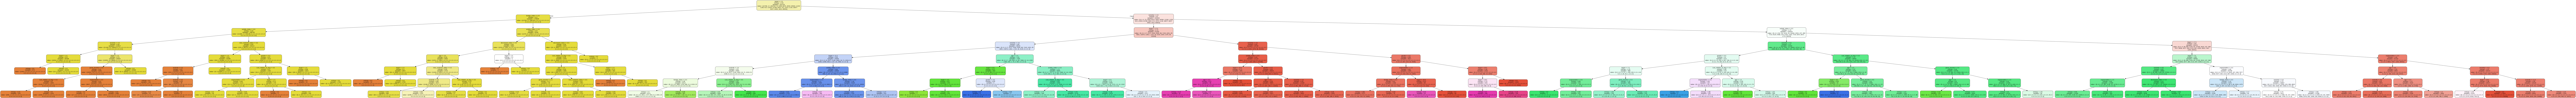

In [ ]:
from IPython.display import Image
import pydot
from six import StringIO

features = list(x.columns)

dot_data = StringIO()

estimator = clf_model.estimators_[1]

from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file=dot_data, 
                feature_names= features,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph[0].create_png(), width=5000, height= 2000)

# KNN v.0.0.1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn_model.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [ ]:
y_preds = knn_model.predict(x)

In [ ]:
print("Accuracy:", accuracy_score(y, y_preds))

Accuracy: 0.9937610999713549


# Model - V.0.0.1 Training

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(max_depth=7)

In [ ]:
model.fit(x, y)

KeyboardInterrupt: ignored

# Model - V.0.0.1 Testing

In [ ]:
y_pred = model.predict(x)
predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy = accuracy_score(y, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print(classification_report(y, y_pred))

# Model - V.0.0.2 Training -- Filter New Products

In [ ]:
import xgboost as xgb

In [ ]:
param = {}
param['objective'] = 'multi:softprob'
param['eta'] = 0.8
param['max_depth'] = 6
param['silent'] = 1
param['num_class'] = 22
param['eval_metric'] = "mlogloss"
param['min_child_weight'] = 12
param['subsample'] = 0.85
param['colsample_bytree'] = 0.9
param['seed'] = 10
num_rounds = 20
 
plst = list(param.items())
xgtrain = xgb.DMatrix(train_x, label=train_y)
model = xgb.train(plst, xgtrain, num_rounds)

# Model - V.0.0.2 Testing -- Filter New Products

In [ ]:
xgtest = xgb.DMatrix(train_x)
preds = model.predict(xgtest)

In [ ]:
len(preds[0, :])

22

In [ ]:
preds.shape

(1222444, 22)

In [ ]:
preds[0, :]

array([0.00973189, 0.00916744, 0.8045014 , 0.00920458, 0.01026831,
       0.00915908, 0.00924987, 0.00917378, 0.00916967, 0.00916664,
       0.00916736, 0.00918273, 0.00928372, 0.0091694 , 0.00917025,
       0.00917114, 0.00918506, 0.00967464, 0.00920883, 0.00917849,
       0.00917064, 0.009645  ], dtype=float32)

In [ ]:
sorted(preds[0, :], reverse=True)

[0.8045014,
 0.010268315,
 0.009731887,
 0.009674643,
 0.009645002,
 0.009283717,
 0.009249865,
 0.009208835,
 0.00920458,
 0.009185062,
 0.009182732,
 0.009178489,
 0.009173778,
 0.009171144,
 0.009170637,
 0.009170253,
 0.009169667,
 0.0091694,
 0.009167445,
 0.009167358,
 0.0091666365,
 0.009159078]

In [ ]:
customer_code = customer_code_df.values

In [ ]:
len(customer_code)

NameError: ignored

In [ ]:
out_df = {}

for i in range(len(preds)):
  pred_products = dict()
  for j in range(len(products)):
    pred_products[products_label[j]] = preds[i, products[j]]
  # print(list({k: pred_products[k] for k in sorted(pred_products, key=pred_products.get, reverse=True)}.keys())[:8])
  out_df[customer_code[i]] = list({k: pred_products[k] for k in sorted(pred_products, key=pred_products.get, reverse=True)}.keys())[:8]

In [ ]:
out_df

{1061260: ['ind_ahor_fin_ult1',
  'ind_cco_fin_ult1',
  'ind_cno_fin_ult1',
  'ind_reca_fin_ult1',
  'ind_recibo_ult1',
  'ind_ecue_fin_ult1',
  'ind_ctma_fin_ult1',
  'ind_cder_fin_ult1'],
 1061283: ['ind_ahor_fin_ult1',
  'ind_cco_fin_ult1',
  'ind_cno_fin_ult1',
  'ind_reca_fin_ult1',
  'ind_recibo_ult1',
  'ind_ecue_fin_ult1',
  'ind_ctma_fin_ult1',
  'ind_cder_fin_ult1'],
 1061336: ['ind_cco_fin_ult1',
  'ind_ahor_fin_ult1',
  'ind_cno_fin_ult1',
  'ind_reca_fin_ult1',
  'ind_recibo_ult1',
  'ind_ecue_fin_ult1',
  'ind_ctma_fin_ult1',
  'ind_cder_fin_ult1'],
 1061286: ['ind_cco_fin_ult1',
  'ind_ahor_fin_ult1',
  'ind_reca_fin_ult1',
  'ind_cno_fin_ult1',
  'ind_recibo_ult1',
  'ind_ecue_fin_ult1',
  'ind_ctma_fin_ult1',
  'ind_cder_fin_ult1'],
 1061288: ['ind_cco_fin_ult1',
  'ind_recibo_ult1',
  'ind_cno_fin_ult1',
  'ind_ahor_fin_ult1',
  'ind_ecue_fin_ult1',
  'ind_reca_fin_ult1',
  'ind_tjcr_fin_ult1',
  'ind_valo_fin_ult1'],
 1061289: ['ind_cco_fin_ult1',
  'ind_ahor_fin_ult